# ANOVA для беты  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from bioinfokit.analys import stat
from scipy.stats import ttest_rel

# ANOVA для кондишена с тремя уровнями (Targeting, Probing, Self Paced)

Используются данные из table_for_anova.csv   

Для этого использовался скрипт: 

/home/vtretyakova/Рабочий стол/ANOVA_for_extrem/table_for_ANOVA.py (В текущей версии есть изменения, но суть та же)

In [2]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova.csv")
d.tail(10)

,Condition,Hand,Minimum_beta,Maximum_beta
133,self_pased,left,-2.264036,1.671180
134,self_pased,left,-10.009629,1.220419
135,self_pased,left,-2.395103,2.580837
136,self_pased,left,-4.061008,2.879128
137,self_pased,left,-3.125089,1.594101
138,self_pased,left,-6.561952,2.634952
139,self_pased,left,-5.808643,3.358962
140,self_pased,left,-7.064633,3.368875
141,self_pased,left,-11.551385,3.668236
142,self_pased,left,-1.985082,2.911335


###### Строим Boxplot для трех условий

In [14]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}

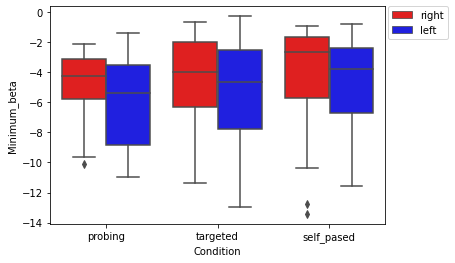

In [15]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_minimum.jpeg", format='jpeg',dpi=300)

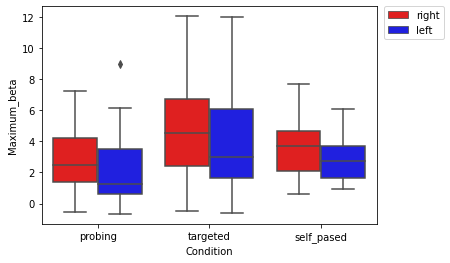

In [22]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Maximum beta'>

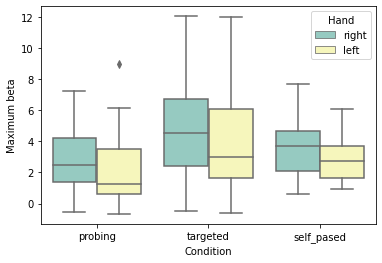

In [5]:
sns.boxplot(x="Condition", y="Maximum beta", hue="Hand", data=d, palette="Set3")

###### Строим модель и проводим дисперсионный анализ

In [8]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),25.076700,2.0,1.306421,0.274139
C(Hand),19.167204,1.0,1.997107,0.159868
C(Condition):C(Hand),1.411014,2.0,0.073510,0.929164
Residual,1314.855075,137.0,NaN,NaN


In [14]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),76.270172,2.0,6.480312,0.002046
C(Hand),19.892888,1.0,3.380407,0.068141
C(Condition):C(Hand),0.830911,2.0,0.070599,0.931870
Residual,806.212269,137.0,NaN,NaN


# ANOVA с тремя факторами (Рука, полушарие, кондишен)

In [11]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova_hemisphere.csv")
d.tail(10)

,Subject,Condition,Hand,Hemisphere,Minimum_beta,Maximum_beta
276,L019,self_pased,left,ipsilateral,-0.971703,1.661839
277,L020,self_pased,left,ipsilateral,-7.706429,1.216165
278,L021,self_pased,left,ipsilateral,-1.568940,1.371818
279,L022,self_pased,left,ipsilateral,-6.432276,0.928684
280,L023,self_pased,left,ipsilateral,-2.394626,1.001507
281,L024,self_pased,left,ipsilateral,-2.817147,1.926853
282,L025,self_pased,left,ipsilateral,-7.019538,1.064132
283,L026,self_pased,left,ipsilateral,-3.989572,2.433487
284,L027,self_pased,left,ipsilateral,-4.089697,4.577562
285,L028,self_pased,left,ipsilateral,-2.749213,1.649776


# Box plot for Minimum

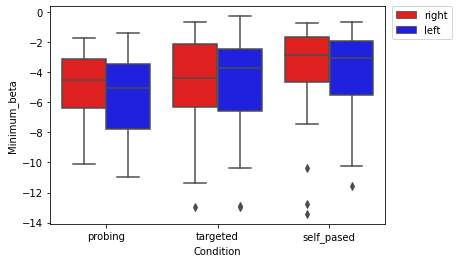

In [22]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

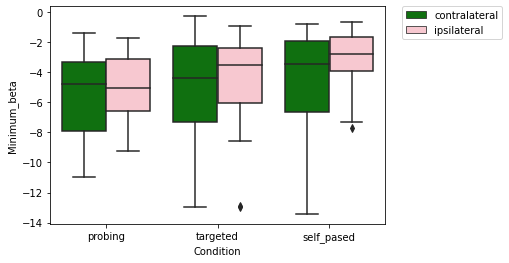

In [25]:
my_pal2 = {Hemisphere: "pink" if Hemisphere == "ipsilateral" else "g" for Hemisphere in d.Hemisphere.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hemisphere", data=d, palette=my_pal2)
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)

# Box plot for Maximum

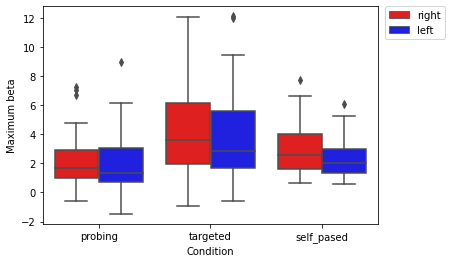

In [8]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
#plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum.jpeg", format='jpeg',dpi=300)

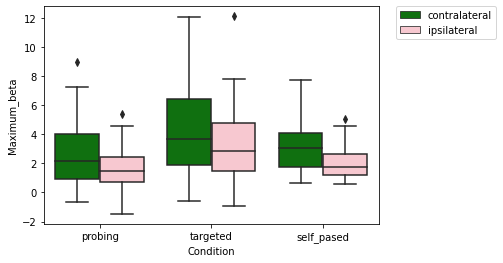

In [24]:
my_pal2 = {Hemisphere: "pink" if Hemisphere == "ipsilateral" else "g" for Hemisphere in d.Hemisphere.unique()}
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hemisphere", data=d, palette=my_pal2)
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)

# !!!!!  
typ=2  
https://stats.stackexchange.com/questions/345684/which-one-to-choose-type-i-type-ii-or-type-iii-anova   

In a balanced design, all three of these model types will yield the same results. With unbalanced data, you will get different results for the main effects but not the interaction term, assuming you only have a two-way interaction (as in your example). The general advice is to use a Type II sums-of-squares model for unbalanced designs. This model tests the main effects without the interaction term. The difference comes down to how you weight each mean or cell of the factorial. In a Type III model, each cell of the factorial gets the same weight (even if some have smaller sample sizes). In a Type II model, each observation gets the same weight. In most situations (but not all!) the latter is more defensible.

If you are only interested in the interaction, then this decision doesn't matter. The sum-of-squares for the interaction will be the same for all three model types.

I just checked and your design is balanced. As such you can use Type III SS. Built-in R functions will work just fine here.

# Minimums

In [14]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)', data=d).fit()
# typ=2, Type 2 Anova DataFrame, see above
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),102.175002,2.0,6.801191,0.001308
C(Hand),2.592954,1.0,0.345196,0.557326
C(Hemisphere),47.240753,1.0,6.289080,0.012723
C(Condition):C(Hand),1.890505,2.0,0.125840,0.881807
C(Hemisphere):C(Hand),20.987516,1.0,2.794032,0.095749
C(Condition):C(Hemisphere),11.746944,2.0,0.781925,0.458535
Residual,2073.188296,276.0,NaN,NaN


# Критерий Тьюки

In [26]:
res = stat()
res.tukey_hsd(df=d, res_var='Minimum_beta', xfac_var='Condition', anova_model= 'Minimum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,0.565208,-0.408473,1.538889,1.934571,0.360193
1,probing,self_pased,1.421862,0.498147,2.345577,5.129944,0.001000
2,targeted,self_pased,0.856654,-0.067061,1.780369,3.090727,0.075542


# Maximum

In [18]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)', data=d).fit()
# typ= 2, Type 2 Anova DataFrame, see above
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),139.373280,2.0,15.196809,5.480911e-07
C(Hand),8.965128,1.0,1.955057,1.631655e-01
C(Hemisphere),89.537765,1.0,19.525813,1.427432e-05
C(Condition):C(Hand),1.925460,2.0,0.209946,8.107574e-01
C(Hemisphere):C(Hand),10.978714,1.0,2.394167,1.229345e-01
C(Condition):C(Hemisphere),0.463041,2.0,0.050489,9.507736e-01
Residual,1265.628401,276.0,NaN,NaN


# Критерий Тьюки (ANOVA с тремя факторами)

In [28]:
res = stat()
res.tukey_hsd(df=d, res_var='Maximum_beta', xfac_var='Condition', anova_model= 'Maximum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.737297,0.976532,2.498062,7.610566,0.00100
1,probing,self_pased,0.553821,-0.167904,1.275546,2.557355,0.16895
2,targeted,self_pased,1.183476,0.461751,1.905201,5.464885,0.00100


# Двухфакторная ANOVA для кондишена с двумя уровнями (Targeting, Probing)

In [11]:
d2 = d[d['Condition'] != 'self_pased']
d2.tail(10)

,Condition,Hand,Minimum_beta,Maximum_beta
78,targeted,left,-5.160903,1.898086
79,targeted,left,-1.982809,5.565144
80,targeted,left,-10.380881,0.849678
81,targeted,left,-4.328391,6.024862
82,targeted,left,-7.810778,1.602543
83,targeted,left,-3.616617,2.831747
84,targeted,left,-7.287090,1.465117
85,targeted,left,-3.795074,9.475308
86,targeted,left,-2.757010,6.391339
87,targeted,left,-4.810514,5.693317


###### Boxplots для двух условий

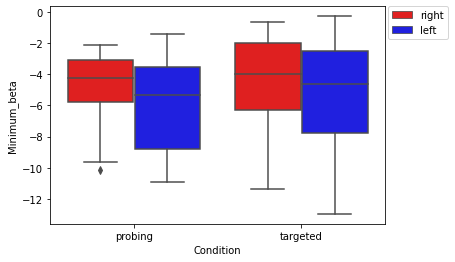

In [12]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d2.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_minimum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Minimum_beta'>

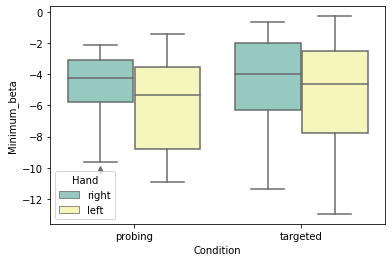

In [6]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette="Set3")

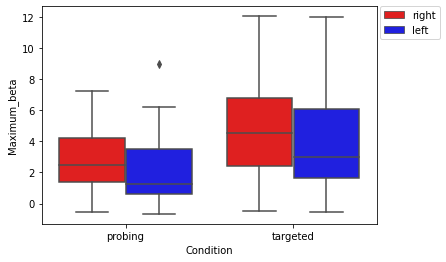

In [13]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()} # задаем цвета
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_maximum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Maximum_beta'>

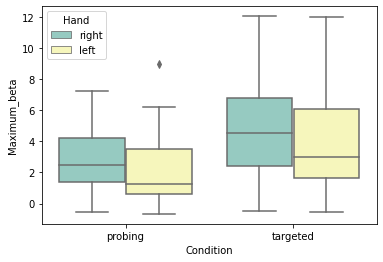

In [7]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette="Set3")

In [12]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),7.312325,1.0,0.834360,0.363629
C(Hand),15.942451,1.0,1.819085,0.181047
C(Condition):C(Hand),0.600818,1.0,0.068555,0.794093
Residual,736.175409,84.0,NaN,NaN


In [13]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),73.684950,1.0,9.234732,0.003165
C(Hand),8.951298,1.0,1.121841,0.292558
C(Condition):C(Hand),0.161985,1.0,0.020301,0.887041
Residual,670.245304,84.0,NaN,NaN


# Тест Тьюки для двухфакторной ANOVA

Теперь мы знаем, что различия беты между условиями статистически значимы, но ANOVA не показывает, при каких кондишенах значение беты значительно отличается друг от друга. Чтобы узнать пары значимо различающихся мощностей беты при отпределенных кондишенах, выполним анализ множественных парных сравнений (Post-hoc comparison), используя тест HSD Тьюки.

In [19]:
res = stat()
res.tukey_hsd(df=d, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.604550,3.055678,5.004261,0.001587
1,probing,self_pased,0.631892,-0.530780,1.794564,1.821309,0.406027
2,targeted,self_pased,1.198222,0.035549,2.360894,3.453646,0.041763


In [20]:
res = stat()
res.tukey_hsd(df=d2, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.632504,3.027724,4.297611,0.003167


# t test для связанных выборок   

Сравниваем beta при Condition: Probing vs Targeted

In [5]:
d2_probing = d2[d2['Condition'] == 'probing']
d2_targeted = d2[d2['Condition'] == 'targeted']

In [7]:
data1 = d2_probing['Maximum_beta']
data2 = d2_targeted['Maximum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-3.899, p=0.000
Different distributions (reject H0)


#####  Получили значимое отличие между максимумами беты для условий  targeting и probing - p-value = 0.05   
##### Сделаем поправку на множественные сравнения с помощью FDR коррекции

In [9]:
rejected, p_val_fdr = fdrcorrection(p, alpha=0.05, method='indep', is_sorted=False)

##### установили, что отличия все еще значимые, даже после коррекции

In [11]:
p_val_fdr

array([0.00033358])

In [16]:
data1 = d2_probing['Minimum_beta']
data2 = d2_targeted['Minimum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.298, p=0.201
Same distributions (fail to reject H0)


# Repeated measures ANOVA Python   

Сравниваем бету при Condition: Probing vs Targeted (одни и те же испытуемые, т.е. выборки связанные)
https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/   

Сначала убираем строки для Self paced

In [2]:
# load data file
#Загружаем данные для Repeated measured ANOVA (добавлен столбец с именами испытуемых)
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anovaRM.csv")
d.tail(10)

,Subject,Condition,Hand,Minimum beta,Maximum beta
133,L019,self_pased,left,-2.264036,1.671180
134,L020,self_pased,left,-10.009629,1.220419
135,L021,self_pased,left,-2.395103,2.580837
136,L022,self_pased,left,-4.061008,2.879128
137,L023,self_pased,left,-3.125089,1.594101
138,L024,self_pased,left,-6.561952,2.634952
139,L025,self_pased,left,-5.808643,3.358962
140,L026,self_pased,left,-7.064633,3.368875
141,L027,self_pased,left,-11.551385,3.668236
142,L028,self_pased,left,-1.985082,2.911335


In [3]:
#Убираем self paced 
d2 = d[d['Condition'] != 'self_pased']
d2.tail(10)

,Subject,Condition,Hand,Minimum beta,Maximum beta
78,372_skju,targeted,left,-5.160903,1.898086
79,389_revi,targeted,left,-1.982809,5.565144
80,390_shko,targeted,left,-10.380881,0.849678
81,394_tiev,targeted,left,-4.328391,6.024862
82,402_maev,targeted,left,-7.810778,1.602543
83,406_bial,targeted,left,-3.616617,2.831747
84,409_kodm,targeted,left,-7.287090,1.465117
85,415_yael,targeted,left,-3.795074,9.475308
86,436_buni,targeted,left,-2.757010,6.391339
87,383_laan,targeted,left,-4.810514,5.693317


In [4]:
############### MINIMUM #####################

aovrm2way = AnovaRM(d2, 'Minimum beta', 'Subject', within=['Condition', 'Hand'])
res2way = aovrm2way.fit()

print(res2way)

                   Anova
               F Value Num DF  Den DF Pr > F
--------------------------------------------
Condition       0.9854 1.0000 21.0000 0.3322
Hand            5.0835 1.0000 21.0000 0.0350
Condition:Hand  0.4189 1.0000 21.0000 0.5245



In [5]:
############### MAXIMUM #####################

aovrm2way = AnovaRM(d2, 'Maximum beta', 'Subject', within=['Condition', 'Hand'])
res2way = aovrm2way.fit()

print(res2way)

                   Anova
               F Value Num DF  Den DF Pr > F
--------------------------------------------
Condition      12.9857 1.0000 21.0000 0.0017
Hand            2.1847 1.0000 21.0000 0.1542
Condition:Hand  0.0382 1.0000 21.0000 0.8469

